In [1]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CartPole-v0")

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
#Environment values
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
2


In [5]:
#Hyperparamters
EPISODES = 10000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.25
EPSILON = 0.2

In [6]:
#Q-Table of size theta_state_size*theta_dot_state_size*env.action_space.n
theta_minmax = env.observation_space.high[2]
theta_dot_minmax = math.radians(50)
theta_state_size = 50
theta_dot_state_size = 50
Q_TABLE = np.random.randn(theta_state_size,theta_dot_state_size,env.action_space.n)

In [7]:
# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

In [8]:
def discretised_state(state):
	#state[2] -> theta
	#state[3] -> theta_dot
	discrete_state = np.array([0,0])		#Initialised discrete array
	theta_window =  ( theta_minmax - (-theta_minmax) ) / theta_state_size
	discrete_state[0] = ( state[2] - (-theta_minmax) ) // theta_window
	discrete_state[0] = min(theta_state_size-1, max(0,discrete_state[0]))

	theta_dot_window =  ( theta_dot_minmax - (-theta_dot_minmax) )/ theta_dot_state_size
	discrete_state[1] = ( state[3] - (-theta_dot_minmax) ) // theta_dot_window
	discrete_state[1] = min(theta_dot_state_size-1, max(0,discrete_state[1]))

	return tuple(discrete_state.astype(int))

In [9]:
for episode in range(EPISODES):
	episode_reward = 0
	done = False

	if episode % EPISODE_DISPLAY == 0:
		render_state = True
	else:
		render_state = False

	curr_discrete_state = discretised_state(env.reset())
	if np.random.random() > EPSILON:
		action = np.argmax(Q_TABLE[curr_discrete_state])
	else:
		action = np.random.randint(0, env.action_space.n)

	while not done:
		new_state, reward, done, _ = env.step(action)
		new_discrete_state = discretised_state(new_state)

		if np.random.random() > EPSILON:
			new_action = np.argmax(Q_TABLE[new_discrete_state])
		else:
			new_action = np.random.randint(0, env.action_space.n)

		if render_state:
			env.render()

		if not done:
			current_q = Q_TABLE[curr_discrete_state+(action,)]
			max_future_q = Q_TABLE[new_discrete_state+(new_action,)]
			new_q = current_q + LEARNING_RATE*(reward+DISCOUNT*max_future_q-current_q)
			Q_TABLE[curr_discrete_state+(action,)]=new_q

		curr_discrete_state = new_discrete_state
		action = new_action

		episode_reward += reward

	ep_rewards.append(episode_reward)

	if not episode % EPISODE_DISPLAY:
		avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
		ep_rewards_table['ep'].append(episode)
		ep_rewards_table['avg'].append(avg_reward)
		ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
		ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))
		print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode:0 avg:27.0 min:27.0 max:27.0
Episode:500 avg:19.916 min:8.0 max:65.0
Episode:1000 avg:18.43 min:8.0 max:70.0
Episode:1500 avg:20.738 min:8.0 max:69.0
Episode:2000 avg:25.026 min:8.0 max:152.0
Episode:2500 avg:32.38 min:8.0 max:200.0
Episode:3000 avg:47.062 min:8.0 max:200.0
Episode:3500 avg:68.1 min:8.0 max:200.0
Episode:4000 avg:71.618 min:8.0 max:200.0
Episode:4500 avg:105.974 min:8.0 max:200.0
Episode:5000 avg:119.742 min:9.0 max:200.0
Episode:5500 avg:125.45 min:9.0 max:200.0
Episode:6000 avg:139.16 min:9.0 max:200.0
Episode:6500 avg:147.548 min:10.0 max:200.0
Episode:7000 avg:153.016 min:11.0 max:200.0
Episode:7500 avg:151.95 min:12.0 max:200.0
Episode:8000 avg:160.324 min:8.0 max:200.0
Episode:8500 avg:168.378 min:16.0 max:200.0
Episode:9000 avg:164.108 min:8.0 max:200.0
Episode:9500 avg:170.508 min:8.0 max:200.0


In [10]:
env.close()

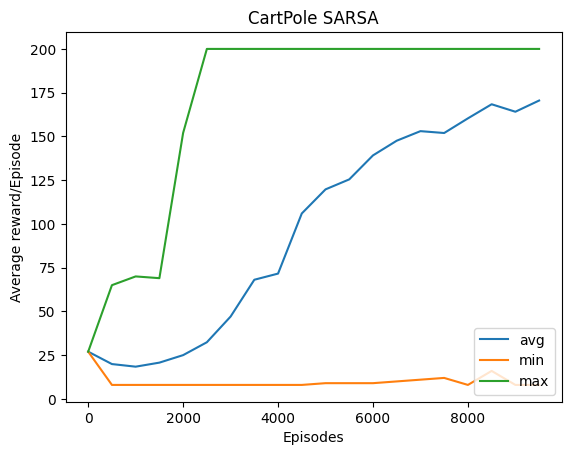

In [11]:
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) #bottom right
plt.title('CartPole SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()